In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [2]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y


def setup_shi(yn,xn,return_model=False,num_params=4):
    x1n,x2n = xn[:,0].reshape(xn.shape[0],1),xn[:,1:num_params]
    # model 1 grad, etc.
    model1 = sm.OLS(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    
    model1_deriv = OLS_loglike(yn,sm.add_constant(x1n))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    
    #model 2 grad, etc.
    model2 = sm.OLS(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    params2 = (model2_fit.params)
    
    model2_deriv = OLS_loglike(yn,sm.add_constant(x2n))
    ll2 = model2_deriv.loglikeobs(model2_fit.params)
    grad2 =  model2_deriv.score_obs(model2_fit.params)    
    hess2 = model2_deriv.hessian(model2_fit.params)
    
    if return_model:
        return ll1,grad1,hess1,params1,model1,ll2,grad2,hess2,params2,model2
    return ll1,grad1,hess1,params1,ll2,grad2,hess2,params2

def gen_data(nobs=1000, a=0.0, num_params=1):
    x = np.random.normal(scale=1., size=(nobs,1+num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x[:,0] + a/np.sqrt(num_params)*x[:,1:num_params+1].sum(axis=1) + e
    return y,x,nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn,return_model=False,num_params=15)
print(grad1.shape,hess1.shape)

(1000, 2) (2, 2)


# a = 0

../figs/a0_k1.png


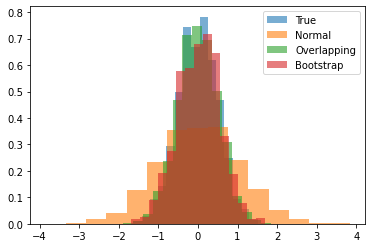

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.000 & 0.253 & -0.008 & 0.002 & -0.008 & 0.192 \\
Bootstrap & 0.025 & 0.286 & -0.018 & -0.005 & -0.018 & 0.240 \\
Normal & 0.015 & 1.012 & 0.026 & -0.028 & 0.026 & 3.045 \\
Overlapping & -0.005 & 0.258 & -0.003 & -0.002 & -0.003 & 0.198 \\
\bottomrule
\end{tabular}
\end{center}


In [11]:
a = 0
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k9.png


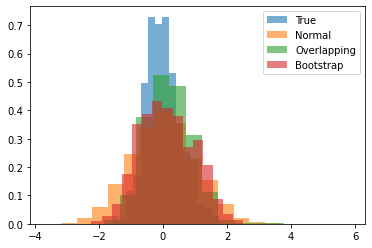

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.000 & 0.308 & 0.055 & 0.010 & 0.055 & 0.292 \\
Bootstrap & 0.117 & 0.721 & 0.089 & -0.277 & 0.089 & 1.279 \\
Normal & 0.029 & 1.018 & 0.066 & -0.086 & 0.066 & 3.018 \\
Overlapping & 0.183 & 0.490 & 0.166 & 0.380 & 0.166 & 1.098 \\
\bottomrule
\end{tabular}
\end{center}


In [18]:
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k4.png


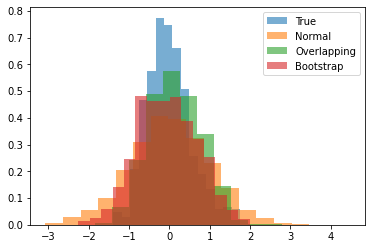

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.000 & 0.307 & 0.097 & 0.042 & 0.097 & 0.321 \\
Bootstrap & -0.051 & 0.555 & 0.027 & -0.129 & 0.027 & 0.793 \\
Normal & 0.016 & 0.972 & -0.026 & -0.016 & -0.026 & 2.813 \\
Overlapping & 0.139 & 0.423 & 0.057 & 0.045 & 0.057 & 0.581 \\
\bottomrule
\end{tabular}
\end{center}


In [5]:
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k19.png


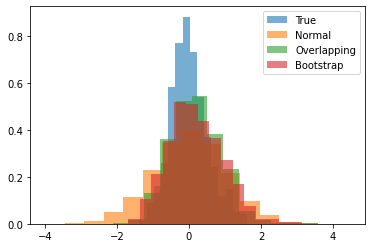

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.000 & 0.265 & 0.055 & 0.014 & 0.055 & 0.223 \\
Bootstrap & 0.196 & 0.583 & 0.170 & 0.036 & 0.170 & 1.050 \\
Normal & 0.019 & 0.992 & -0.038 & 0.005 & -0.038 & 2.952 \\
Overlapping & 0.176 & 0.476 & 0.131 & 0.211 & 0.131 & 0.888 \\
\bottomrule
\end{tabular}
\end{center}


In [15]:
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

# a = .25

../figs/a25_k1.png


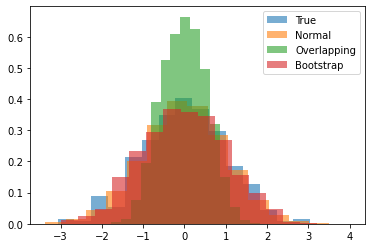

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.000 & 1.020 & -0.070 & -0.016 & -0.069 & 3.079 \\
Bootstrap & -0.001 & 1.015 & -0.006 & -0.224 & -0.006 & 2.856 \\
Normal & -0.006 & 1.010 & -0.001 & 0.036 & -0.001 & 3.092 \\
Overlapping & -0.013 & 0.303 & 0.003 & -0.035 & 0.003 & 0.240 \\
\bottomrule
\end{tabular}
\end{center}


In [7]:
a=.25
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k9.png


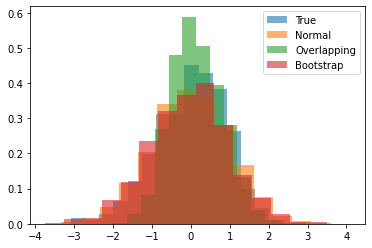

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.000 & 0.811 & -0.301 & 0.095 & -0.299 & 2.053 \\
Bootstrap & -0.050 & 1.034 & -0.081 & 0.217 & -0.081 & 3.410 \\
Normal & 0.017 & 1.015 & 0.017 & -0.002 & 0.017 & 3.086 \\
Overlapping & 0.161 & 0.453 & 0.073 & -0.002 & 0.073 & 0.612 \\
\bottomrule
\end{tabular}
\end{center}


In [8]:
a=.25
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k4.png


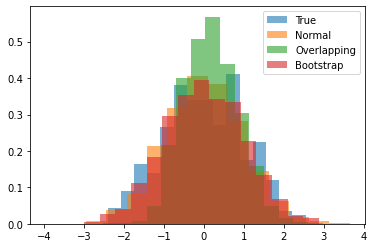

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.000 & 1.027 & -0.012 & -0.645 & -0.012 & 2.502 \\
Bootstrap & 0.014 & 0.958 & 0.005 & -0.222 & 0.005 & 2.522 \\
Normal & -0.001 & 0.934 & 0.046 & 0.122 & 0.046 & 2.738 \\
Overlapping & 0.171 & 0.466 & 0.063 & -0.021 & 0.063 & 0.630 \\
\bottomrule
\end{tabular}
\end{center}


In [19]:
a=.25
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k19.png


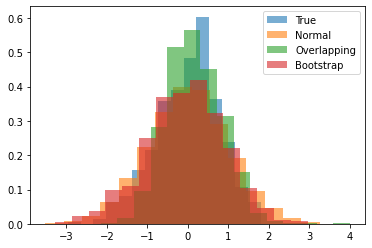

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.000 & 0.613 & -0.190 & 0.021 & -0.189 & 1.139 \\
Bootstrap & -0.071 & 0.936 & -0.143 & 0.027 & -0.142 & 2.643 \\
Normal & 0.010 & 0.999 & -0.007 & 0.009 & -0.007 & 3.003 \\
Overlapping & 0.155 & 0.462 & 0.093 & 0.078 & 0.093 & 0.717 \\
\bottomrule
\end{tabular}
\end{center}


In [20]:
a= .25
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))